# Basis Daten

### Import & konstanten 

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

### Daten auslesen

In [67]:
PFAD : str = "Daten/basis_daten.csv"
basis_df =pd.read_csv(PFAD, delimiter=";", decimal=",")
basis_df.info()
print(basis_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381661 entries, 0 to 381660
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Monat      381661 non-null  int64  
 1   KW         381661 non-null  int64  
 2   Jahr       381661 non-null  int64  
 3   Datum      381661 non-null  object 
 4   Hof        381661 non-null  object 
 5   Schicht    381661 non-null  int64  
 6   Tour       381661 non-null  int64  
 7   Tonnage    381661 non-null  float64
 8   Abfallart  381661 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 26.2+ MB
        Monat  KW  Jahr     Datum    Hof  Schicht  Tour  Tonnage     Abfallart
0           1   1  2019  02.01.19    VMF        1     1     5.59           BIO
1           1   1  2019  02.01.19    VMF        1     4     3.23           BIO
2           1   1  2019  02.01.19    VMF        1     5     5.68           BIO
3           1   1  2019  02.01.19    VMF        1     6     

### Tonnage von 

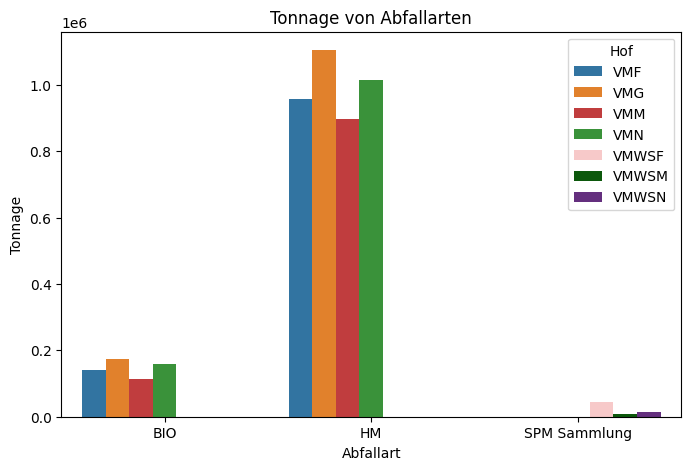

In [68]:
custom_colors = {
    "VMF": "#1f77b4",
    "VMG": "#ff7f0e",
    "VMN": "#2ca02c",
    "VMM": "#d62728",
    "VMWSF": "#ffc1c1",
    "VMWSM": "#006400",
    "VMWSN": "#68228b"
}

tonnage_sum = basis_df.groupby(["Hof", "Abfallart"])["Tonnage"].sum().reset_index()


plt.figure(figsize=(8, 5))

sns.barplot(
    data=tonnage_sum,          
    x="Abfallart",             
    y="Tonnage",               
    hue="Hof",                 
    palette=custom_colors      
)



plt.xlabel("Abfallart")
plt.ylabel("Tonnage")
plt.title("Tonnage von Abfallarten")

plt.show()

### Tonnage von Jahren

Jahr
2019    913775.87
2020    945783.48
2021    949768.73
2022    908454.68
2023    910033.66
Name: Tonnage, dtype: float64


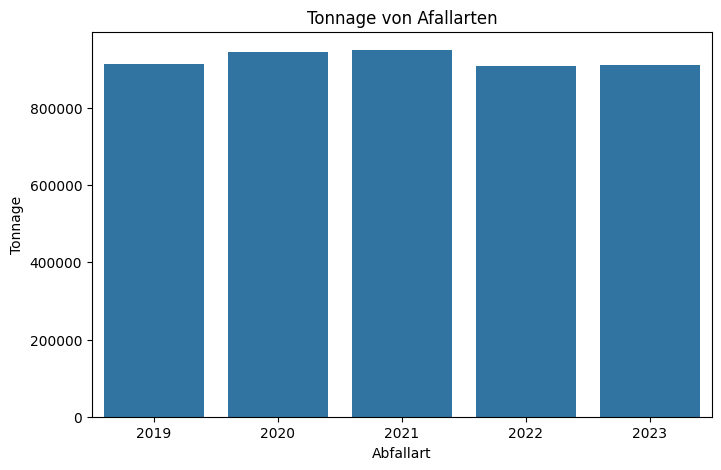

In [69]:
tonnage_sum = basis_df.groupby("Jahr")["Tonnage"].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=tonnage_sum.index, y=tonnage_sum.values)

plt.xlabel("Abfallart")
plt.ylabel("Tonnage")
plt.title("Tonnage von Afallarten")

print(tonnage_sum)

plt.show()

### Abfall zu bestimmten Zeiten

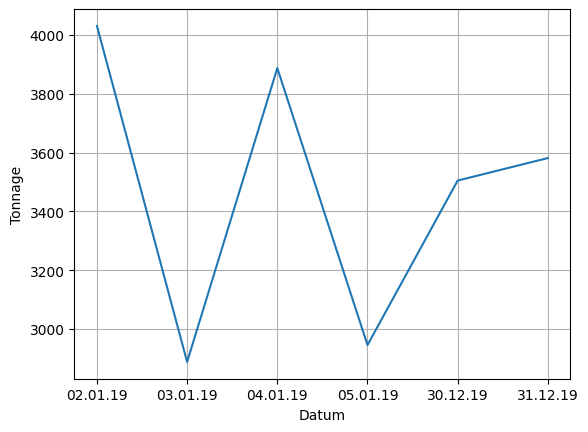

In [70]:
plt.xlabel("Datum")

plt.ylabel("Tonnage")

filter_df = basis_df[basis_df["Jahr"] == int(2019)]

# filter_df_df = filter_df[filter_df["Monat"]==int(1)]

filter_df = filter_df[filter_df["KW"]==int(1)]

# filter_df = filter_df[filter_df["Tour"]==int(1)]

# filter_df = filter_df[filter_df["Hof"]==str("VMF")]

# Gruppiere nach Tour und summiere die Tonnage
filter_df = filter_df.groupby('Datum')['Tonnage'].sum().reset_index()

plt.plot(filter_df["Datum"], filter_df["Tonnage"])

plt.grid(True)

plt.show()

### Gesamte Tonnage für alle Höfe verteilt auf Kalenderwoche

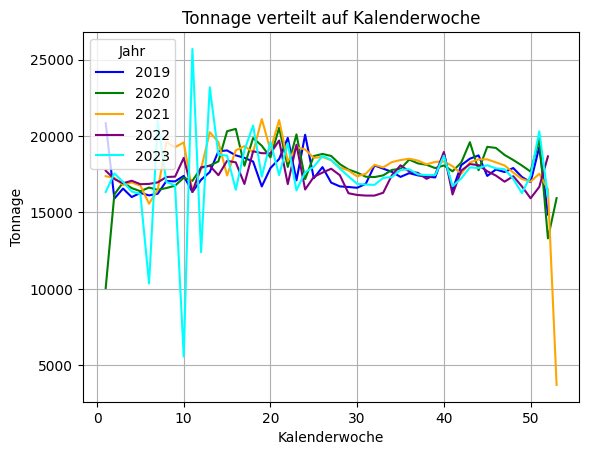

In [79]:
plt.xlabel("Kalenderwoche")

plt.ylabel("Tonnage")

plt.title("Tonnage verteilt auf Kalenderwoche")

#2019

filter_df19 = basis_df[basis_df["Jahr"] == int(2019)]

filter_df19 = filter_df19.groupby('KW')['Tonnage'].sum().reset_index()

#2020

filter_df20 = basis_df[basis_df["Jahr"] == int(2020)]

filter_df20 = filter_df20.groupby('KW')['Tonnage'].sum().reset_index()

#2021

filter_df21 = basis_df[basis_df["Jahr"] == int(2021)]

filter_df21 = filter_df21.groupby('KW')['Tonnage'].sum().reset_index()

#2022

filter_df22 = basis_df[basis_df["Jahr"] == int(2022)]

filter_df22 = filter_df22.groupby('KW')['Tonnage'].sum().reset_index()

#2023

filter_df23 = basis_df[basis_df["Jahr"] == int(2023)]

filter_df23 = filter_df23.groupby('KW')['Tonnage'].sum().reset_index()

#plot

plt.plot(filter_df19["KW"], filter_df19["Tonnage"], color = "blue", label="2019")

plt.plot(filter_df20["KW"], filter_df20["Tonnage"], color = "green", label="2020")

plt.plot(filter_df21["KW"], filter_df21["Tonnage"], color = "orange", label="2021")

plt.plot(filter_df22["KW"], filter_df22["Tonnage"], color = "purple", label="2022")

plt.plot(filter_df23["KW"], filter_df23["Tonnage"], color = "cyan", label="2023")

plt.legend(loc='upper left',title="Jahr")
plt.grid(True)

plt.show()

### Notizen
- 2023 Warnstreiks

Quelle:
https://www.bsr.de/presse-20012.php

folgendes ist noch flasch

### Anzahl der Touren über das Jahr

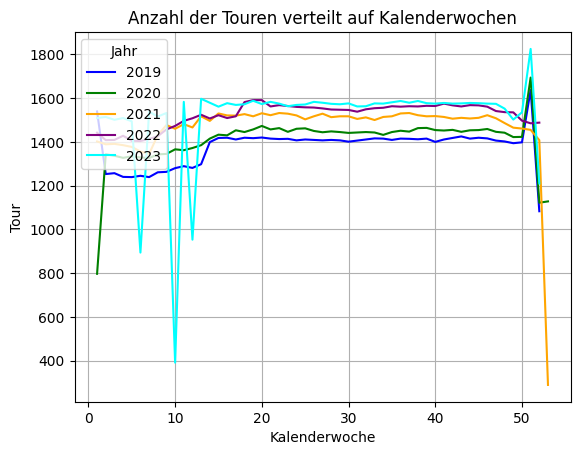

In [81]:
plt.xlabel("Kalenderwoche")

plt.ylabel("Tour")

plt.title("Anzahl der Touren verteilt auf Kalenderwochen")

#2019

filter_df19 = basis_df[basis_df["Jahr"] == int(2019)]

filter_df19 = filter_df19.groupby('KW')['Tour'].count()

#2020

filter_df20 = basis_df[basis_df["Jahr"] == int(2020)]

filter_df20 = filter_df20.groupby('KW')['Tour'].count()

#2021

filter_df21 = basis_df[basis_df["Jahr"] == int(2021)]

filter_df21 = filter_df21.groupby('KW')['Tour'].count()

#2022

filter_df22 = basis_df[basis_df["Jahr"] == int(2022)]

filter_df22 = filter_df22.groupby('KW')['Tour'].count()

#2023

filter_df23 = basis_df[basis_df["Jahr"] == int(2023)]

filter_df23 = filter_df23.groupby('KW')['Tour'].count()

#plot

plt.plot(filter_df19.index, filter_df19.values, color="blue", label="2019")

plt.plot(filter_df20.index, filter_df20.values, color="green", label="2020")

plt.plot(filter_df21.index, filter_df21.values, color="orange", label="2021")

plt.plot(filter_df22.index, filter_df22.values, color="purple", label="2022")

plt.plot(filter_df23.index, filter_df23.values, color="cyan", label="2023")

plt.legend(loc='upper left',title="Jahr")
plt.grid(True)

plt.show()

In [72]:
# plt.xlabel("Tag des Monats")
# plt.ylabel("Tonnage")

# # Annahme: basis_df hat eine Spalte "Datum" im Format YYYY-MM-DD
# basis_df["Datum"] = pd.to_datetime(basis_df["Datum"])
# basis_df["Tag"] = basis_df["Datum"].dt.day

# # Filtere nach KW 10
# basis_df = basis_df[basis_df["KW"] == int(53)]

# # 2019
# filter_df19 = basis_df[basis_df["Jahr"] == int(2019)].groupby('Datum')['Tonnage'].sum().reset_index()
# filter_df19["Tag"] = filter_df19["Datum"].dt.day  # Tag extrahieren

# # 2020
# filter_df20 = basis_df[basis_df["Jahr"] == int(2020)].groupby('Datum')['Tonnage'].sum().reset_index()
# filter_df20["Tag"] = filter_df20["Datum"].dt.day

# # 2021
# filter_df21 = basis_df[basis_df["Jahr"] == int(2021)].groupby('Datum')['Tonnage'].sum().reset_index()
# filter_df21["Tag"] = filter_df21["Datum"].dt.day

# # 2022
# filter_df22 = basis_df[basis_df["Jahr"] == int(2022)].groupby('Datum')['Tonnage'].sum().reset_index()
# filter_df22["Tag"] = filter_df22["Datum"].dt.day

# # 2023
# filter_df23 = basis_df[basis_df["Jahr"] == int(2023)].groupby('Datum')['Tonnage'].sum().reset_index()
# filter_df23["Tag"] = filter_df23["Datum"].dt.day

# # Plot
# plt.plot(filter_df19["Tag"], filter_df19["Tonnage"], color="blue", label="2019")
# plt.plot(filter_df20["Tag"], filter_df20["Tonnage"], color="green", label="2020")
# plt.plot(filter_df21["Tag"], filter_df21["Tonnage"], color="orange", label="2021")
# plt.plot(filter_df22["Tag"], filter_df22["Tonnage"], color="purple", label="2022")
# plt.plot(filter_df23["Tag"], filter_df23["Tonnage"], color="cyan", label="2023")

# # Legende und Gitter
# plt.legend(loc='upper left', title="Jahr")
# plt.grid(True)

# # Plot anzeigen
# plt.show()


2023 bis zum 4 Monat mitteln

In [73]:
PFAD2 = "Daten/basis_daten2.csv"
basis_df2 =pd.read_csv(PFAD2, delimiter=";", decimal=",")

### folgenden code kommentiert lassen

In [74]:
# # Filter für Zeitbereich: Januar bis März 2023
# filter_mask = (basis_df2['Monat'] >= 1) & (basis_df2['Monat'] <= 4) & (basis_df2['Jahr'] == 2023)

# # Sicherstellen, dass "Tonnage" numerisch ist
# basis_df2['Tonnage'] = pd.to_numeric(basis_df2['Tonnage'], errors='coerce')

# # Mittelwert berechnen, NaN-Werte ignorieren
# mean_value = basis_df2.loc[filter_mask, 'Tonnage'].mean(skipna=True)

# # Prüfen, ob ein gültiger Mittelwert berechnet wurde
# if pd.notna(mean_value):
#     # Mittelwert in die Tonnage-Spalte für den gefilterten Bereich einfügen
#     basis_df2.loc[filter_mask, 'Tonnage'] = mean_value
#     print(f"Der Mittelwert von {mean_value} wurde in die Tonnage-Spalte eingefügt.")
# else:
#     print("Kein gültiger Mittelwert berechnet (keine Daten oder nur NaN-Werte).")

# # CSV-Datei speichern
# try:
#     basis_df2.to_csv(PFAD2, index=False, sep=';', decimal=",")
#     print(f"CSV-Datei erfolgreich gespeichert unter {PFAD2}")
# except Exception as e:
#     print(f"Fehler beim Speichern der CSV-Datei: {e}")


### Anzahl der Touren in einer KW

C:\Users\leona\AppData\Local\Temp\ipykernel_13424\3806465771.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_df_KW = filter_jahr_2023[(filter_jahr_2023["Monat"] <= int(5)) & (basis_df["Monat"] >= int(1))]


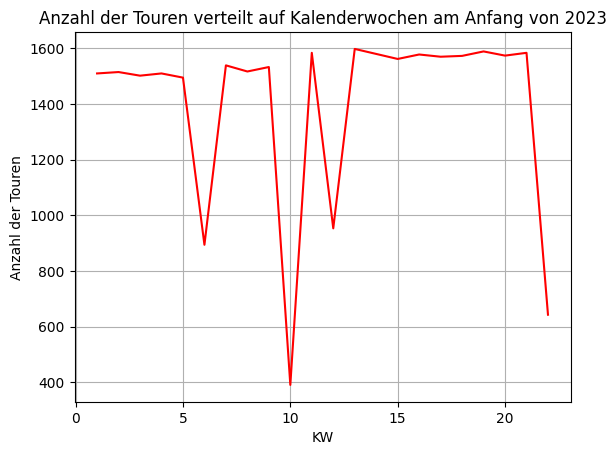

In [91]:
plt.xlabel("KW")

plt.ylabel("Anzahl der Touren")

plt.title("Anzahl der Touren verteilt auf Kalenderwochen am Anfang von 2023")

filter_jahr_2023 = basis_df[basis_df["Jahr"] == int(2023)]

filter_df_KW = filter_jahr_2023[(filter_jahr_2023["Monat"] <= int(5)) & (basis_df["Monat"] >= int(1))]

filter_count_Tour = filter_df_KW.groupby('KW')['Tour'].count()

plt.plot(filter_count_Tour.index, filter_count_Tour, color = "red")

plt.grid(True)

plt.show()

